# Zoltan's LR script in the scenario of a RDP intrusion
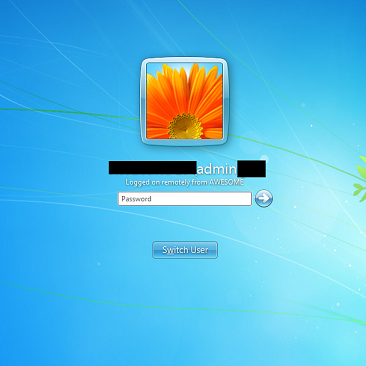

## First, collect exact time:


In [1]:
date

Tue Mar  6 15:14:49 Mountain Standard Time 2018


## Check who is logged in:

In [2]:
logonsessions -accepteula


LogonSessions v1.4 - Lists logon session information
Copyright (C) 2004-2016 Mark Russinovich
Sysinternals - www.sysinternals.com


[0] Logon session 00000000:000003e7:
    User name:    WORKGROUP\DESKTOP-D7UUPF1$
    Auth package: NTLM
    Logon type:   (none)
    Session:      0
    Sid:          S-1-5-18
    Logon time:   3/6/2018 2:41:24 PM
    Logon server: 
    DNS Domain:   
    UPN:          

[1] Logon session 00000000:0000496e:
    User name:    
    Auth package: NTLM
    Logon type:   (none)
    Session:      0
    Sid:          (none)
    Logon time:   3/6/2018 2:41:24 PM
    Logon server: 
    DNS Domain:   
    UPN:          

[2] Logon session 00000000:00004cda:
    User name:    Font Driver Host\UMFD-1
    Auth package: Negotiate
    Logon type:   Interactive
    Session:      1
    Sid:          S-1-5-96-0-1
    Logon time:   3/6/2018 2:41:25 PM
    Logon server: 
    DNS Domain:   
    UPN:          

[3] Logon session 00000000:00004d04:
    User name:    Font Drive

## Look for active network connections:

In [3]:
netstat -abn


Active Connections

  Proto  Local Address          Foreign Address        State
  TCP    0.0.0.0:135            0.0.0.0:0              LISTENING
  RpcSs
 [svchost.exe]
  TCP    0.0.0.0:445            0.0.0.0:0              LISTENING
 Can not obtain ownership information
  TCP    0.0.0.0:7680           0.0.0.0:0              LISTENING
  DoSvc
 [svchost.exe]
  TCP    0.0.0.0:49664          0.0.0.0:0              LISTENING
 Can not obtain ownership information
  TCP    0.0.0.0:49665          0.0.0.0:0              LISTENING
  EventLog
 [svchost.exe]
  TCP    0.0.0.0:49666          0.0.0.0:0              LISTENING
  Schedule
 [svchost.exe]
  TCP    0.0.0.0:49667          0.0.0.0:0              LISTENING
 [spoolsv.exe]
  TCP    0.0.0.0:49668          0.0.0.0:0              LISTENING
 Can not obtain ownership information
  TCP    0.0.0.0:49673          0.0.0.0:0              LISTENING
 [lsass.exe]
  TCP    10.0.2.15:139          0.0.0.0:0              LISTENING
 Can not obtain ownership in

## Collect information about the ARP table:

In [4]:
arp -a


Interface: 10.0.2.15 --- 0x9
  Internet Address      Physical Address      Type
  10.0.2.2              52-54-00-12-35-02     dynamic   
  10.0.2.255            ff-ff-ff-ff-ff-ff     static    
  224.0.0.22            01-00-5e-00-00-16     static    
  224.0.0.252           01-00-5e-00-00-fc     static    
  239.255.255.250       01-00-5e-7f-ff-fa     static    
  255.255.255.255       ff-ff-ff-ff-ff-ff     static    


## Check all user accounts on the system:

In [5]:
net user


User accounts for \\DESKTOP-D7UUPF1

-------------------------------------------------------------------------------
Administrator            DefaultAccount           Guest                    
WDAGUtilityAccount       Z                        
The command completed successfully.



## List all running processes:

In [6]:
pslist


PsList v1.4 - Process information lister
Copyright (C) 2000-2016 Mark Russinovich
Sysinternals - www.sysinternals.com

Process information for DESKTOP-D7UUPF1:

Name                Pid Pri Thd  Hnd   Priv        CPU Time    Elapsed Time 
Idle                  0   0   1    0     52     0:31:42.000     0:34:20.094
System                4   8  94 2632    156     0:00:09.906     0:34:20.094
smss                264  11   2   52    472     0:00:00.156     0:34:20.091
csrss               352  13  10  282   1548     0:00:00.296     0:34:18.313
wininit             432  13   1  146   1248     0:00:00.093     0:34:18.132
csrss               444  13  11  383   1556     0:00:00.828     0:34:18.117
winlogon            504  13   3  229   2276     0:00:00.062     0:34:18.036
services            528   9   7  288   3048     0:00:00.421     0:34:17.964
lsass               536   9   9 1188   6132     0:00:00.687     0:34:17.934
fontdrvhost         652   8   5   65   1764     0:00:00.078     0:34:17.715
f